In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [134]:
from sklearn import model_selection
from sklearn import linear_model

In [135]:
%matplotlib inline
plt.style.use('ggplot')

In [136]:
houses = pd.read_csv('../train.csv')

In [137]:
MSSubClass = \
'''
20:1-STORY 1946 & NEWER ALL STYLES
30:1-STORY 1945 & OLDER
40:1-STORY W/FINISHED ATTIC ALL AGES
45:1-1/2 STORY - UNFINISHED ALL AGES
50:1-1/2 STORY FINISHED ALL AGES
60:2-STORY 1946 & NEWER
70:2-STORY 1945 & OLDER
75:2-1/2 STORY ALL AGES
80:SPLIT OR MULTI-LEVEL
85:SPLIT FOYER
90:DUPLEX - ALL STYLES AND AGES
120:1-STORY PUD (Planned Unit Development) - 1946 & NEWER
150:1-1/2 STORY PUD - ALL AGES
160:2-STORY PUD - 1946 & NEWER
180:PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
190:2 FAMILY CONVERSION - ALL STYLES AND AGES
'''

MSSubClass_split = MSSubClass.strip().split('\n')
MSSubClass_dict = {int(k.split(':')[0]): k.split(':')[1] for k in MSSubClass_split}

In [138]:
houses['MSSubClass'] = houses['MSSubClass'].apply(lambda x: MSSubClass_dict[x])

In [139]:
dtypes = pd.Series([houses[x].dtype for x in houses.columns])

In [140]:
is_numeric = dtypes.apply(lambda x: True if x == int or x == float else False)

In [141]:
num_cols = houses.columns[is_numeric]

In [142]:
cat_cols = houses.columns[~is_numeric]

In [143]:
hdummy = houses.copy()

for col in cat_cols:
    for value in houses[col].unique():
        hdummy['{}${}'.format(col,value)] = hdummy[col] == value
    hdummy.drop(col, axis=1, inplace=True)

In [144]:
for col in num_cols:
    hdummy["%s$is_null" % col] = hdummy[col].isnull()
    hdummy[col].fillna(-1, inplace=True)

In [145]:
hdummy.to_csv('../data/train_withdummy.csv')

In [171]:
y = hdummy['SalePrice']
X = hdummy.drop('SalePrice', axis=1)

In [154]:
#Xtr, Xte, ytr, yte = model_selection.train_test_split(X,y, test_size=.2)

In [157]:
model = linear_model.Lasso(alpha=.1, max_iter=10000)

In [158]:
model.fit(Xtr, ytr)

/Users/travis/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [184]:
coeffs = []
for alp in np.linspace(0,100, 101):
    model = linear_model.Lasso(alpha=alp, max_iter=500)
    model.fit(X,y)
    row = {k:v for k,v in zip(hdummy.columns, model.coef_)}
    row['alpha'] = alp
    coeffs.append(row)

/Users/travis/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  after removing the cwd from sys.path.
/Users/travis/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/Users/travis/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [185]:
codf = pd.DataFrame(coeffs)

In [186]:
codf = codf.set_index('alpha')

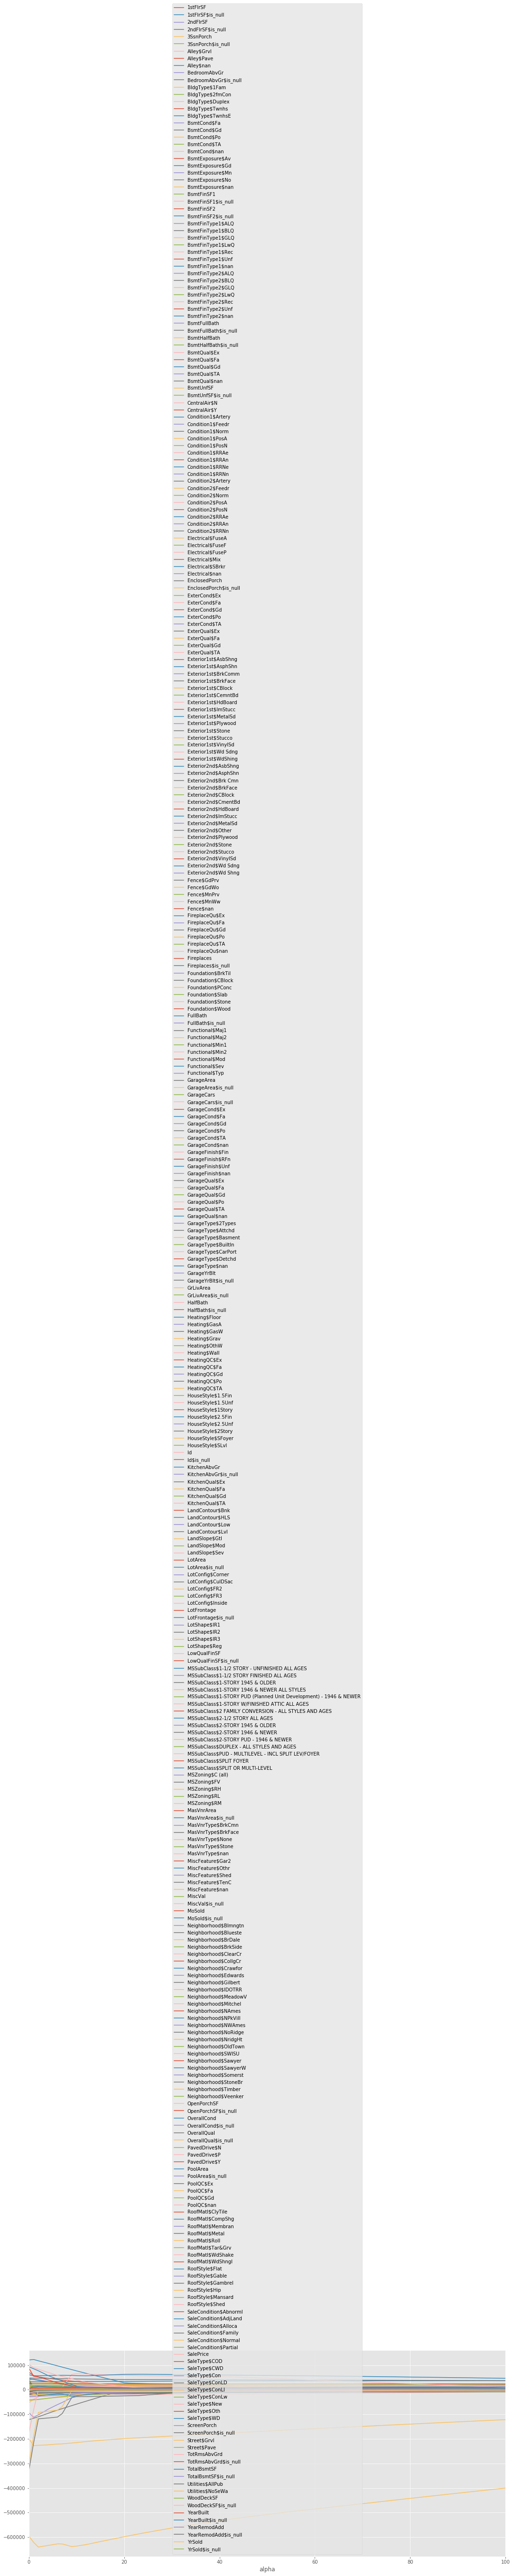

In [187]:
codf.plot(figsize=(18,8))